In [41]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy.stats

import statsmodels.api as sm


%matplotlib inline

plt.rc('axes', labelsize=20) 
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13) 
mpl.rcParams['axes.titlesize'] = 24

In [42]:
election_results = pd.read_csv('data/processed_data/elections_camaras_municipais_portugal.csv')

In [43]:
# Get only rows for which the candidate names are available
election_results_name_not_null = election_results[election_results.candidate_name.notnull()]

# Add column with first name of candidates
election_results_name_not_null['first_name'] = election_results_name_not_null.apply(lambda candidate: candidate.candidate_name.split(' ')[0], 1)

# Add column with last name of candidates
election_results_name_not_null['last_name'] = election_results_name_not_null.apply(lambda candidate: candidate.candidate_name.split(' ')[-1], 1)

# Add columns with number of syllabes
election_results_name_not_null['first_name_length'] = election_results_name_not_null.first_name.apply(lambda name: len(name))
election_results_name_not_null['last_name_length'] = election_results_name_not_null.last_name.apply(lambda name: len(name))

/home/lcampos/Envs/local-elections-analysis/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/lcampos/Envs/local-elections-analysis/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/lcampos/Envs/local-elections-analysis/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [44]:
counts_names = election_results_name_not_null.first_name.value_counts()
total = sum(counts_names)
percentage_names = (counts_names / float(total)) * 100

In [45]:
counts_names_females = election_results_name_not_null[election_results_name_not_null.gender == 'female'].first_name.value_counts()
total_females = sum(counts_names_females)
percentage_names_females = (counts_names_females / float(total_females)) * 100

In [46]:
counts_names_males = election_results_name_not_null[election_results_name_not_null.gender == 'male'].first_name.value_counts()
total_males = sum(counts_names_males)
percentage_names_males = (counts_names_males / float(total_males)) * 100

In [47]:
percentage_names_males

José         13.816926
António      10.405872
João          7.944732
Carlos        5.181347
Manuel        5.051813
Luís          2.892919
Rui           2.892919
Francisco     2.849741
Jorge         2.849741
Fernando      2.590674
Joaquim       2.547496
Paulo         2.461140
Pedro         2.115717
Nuno          2.072539
Mário         1.683938
Luis          1.424870
Ricardo       0.949914
Artur         0.906736
Eduardo       0.906736
Vítor         0.820380
Vitor         0.647668
Miguel        0.647668
Alberto       0.604491
Augusto       0.518135
Filipe        0.518135
Álvaro        0.474957
Adelino       0.474957
Marco         0.474957
Rogério       0.474957
Américo       0.431779
               ...    
Frutuoso      0.043178
Honório       0.043178
Gerónimo      0.043178
Mark          0.043178
Angelo        0.043178
Graciano      0.043178
Noel          0.043178
Herlander     0.043178
Hermann       0.043178
Silvério      0.043178
Pinto         0.043178
Desidério     0.043178
Dinarte    

In [48]:
election_results_name_not_null

,INE_ID,year,concelho,enrolled,voters,abstention_%,blank_votes,null_votes,party_initials,party_type,...,votes_%,number_mandates,candidate_name,gender,position_ballot,problems_ballot_order,first_name,last_name,first_name_length,last_name_length
1297,101,2009,ÁGUEDA,43870,26744,39.038067,454,253,PS,Party,...,55.954987,4,Gil Nadais Resende Da Fonseca,male,NaN,NaN,Gil,Fonseca,3,7
1298,101,2009,ÁGUEDA,43870,26744,39.038067,454,253,PPD/PSD,Party,...,35.077006,3,Manuel De Castro Azevedo,male,NaN,NaN,Manuel,Azevedo,6,7
1299,101,2009,ÁGUEDA,43870,26744,39.038067,454,253,PND,Party,...,0.403272,0,Alexandra Isabel Ferreira Abrantes,female,NaN,NaN,Alexandra,Abrantes,9,8
1300,101,2009,ÁGUEDA,43870,26744,39.038067,454,253,PCP-PEV,Alliance,...,1.954910,0,Nelson Manuel Nunes Leal,male,NaN,NaN,Nelson,Leal,6,4
1301,101,2009,ÁGUEDA,43870,26744,39.038067,454,253,B.E.,Party,...,1.313515,0,Vítor Manuel Aguiar Gomes,male,NaN,NaN,Vítor,Gomes,6,5
1302,101,2009,ÁGUEDA,43870,26744,39.038067,454,253,CDS-PP,Party,...,5.296309,0,José Carlos Esmeraldo Dos Santos,male,NaN,NaN,José,Santos,5,6
1303,102,2009,ALBERGARIA-A-VELHA,22175,13506,39.093574,218,149,PCP-PEV,Alliance,...,1.864678,0,Bruno Miguel Alves Bento,male,NaN,NaN,Bruno,Bento,5,5
1304,102,2009,ALBERGARIA-A-VELHA,22175,13506,39.093574,218,149,CDS-PP,Party,...,33.320648,2,António Augusto Amaral Loureiro E Santos,male,NaN,NaN,António,Santos,8,6
1305,102,2009,ALBERGARIA-A-VELHA,22175,13506,39.093574,218,149,PPD/PSD,Party,...,49.105716,4,João Agostinho Pinto Pereira,male,NaN,NaN,João,Pereira,5,7
1306,102,2009,ALBERGARIA-A-VELHA,22175,13506,39.093574,218,149,PS,Party,...,13.973666,1,Jesus Manuel Vidinha Tomás,male,NaN,NaN,Jesus,Tomás,5,6


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                votes_%   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.024
Date:                Sat, 22 Apr 2017   Prob (F-statistic):             0.0450
Time:                        16:15:47   Log-Likelihood:                -11960.
No. Observations:                2670   AIC:                         2.392e+04
Df Residuals:                    2668   BIC:                         2.394e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                19.7824      1.691     11.700      0.000      16.467      23.098
first_name_length     0.5459      0.272      2.006      0.045       0.012       1.080
==============================================================================
Omnibus:                      777.318   Durbin-Watson:                   2.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.544
Skew:                           0.589   Prob(JB):                     4.86e-59
Kurtosis:                       1.986   Cond. No.                         26.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

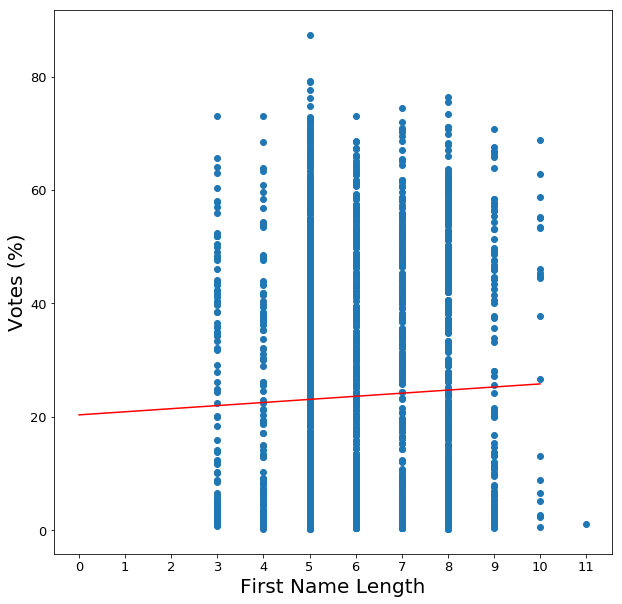

In [53]:
X = election_results_name_not_null.first_name_length
X = sm.add_constant(X)
y = election_results_name_not_null['votes_%']

model = sm.OLS(y, X)

est = model.fit()

const, first_name_coef = est.params

plt.scatter(X.first_name_length, y)
plt.xlabel('First Name Length')
plt.ylabel('Votes (%)')
plt.xticks(np.arange(0, max(X.first_name_length)+1, 1.0))

regresssion_line = map(lambda x: first_name_coef * x + const, range(1,12))
plt.plot(regresssion_line, 'r')

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                votes_%   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1520
Date:                Sat, 22 Apr 2017   Prob (F-statistic):              0.697
Time:                        16:16:48   Log-Likelihood:                -11962.
No. Observations:                2670   AIC:                         2.393e+04
Df Residuals:                    2668   BIC:                         2.394e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               22.4270      1.703     13.167      0.000      19.087      25.767
last_name_length     0.0974      0.250      0.390      0.697      -0.392       0.587
==============================================================================
Omnibus:                      794.391   Durbin-Watson:                   2.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.711
Skew:                           0.591   Prob(JB):                     1.64e-59
Kurtosis:                       1.981   Cond. No.                         28.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

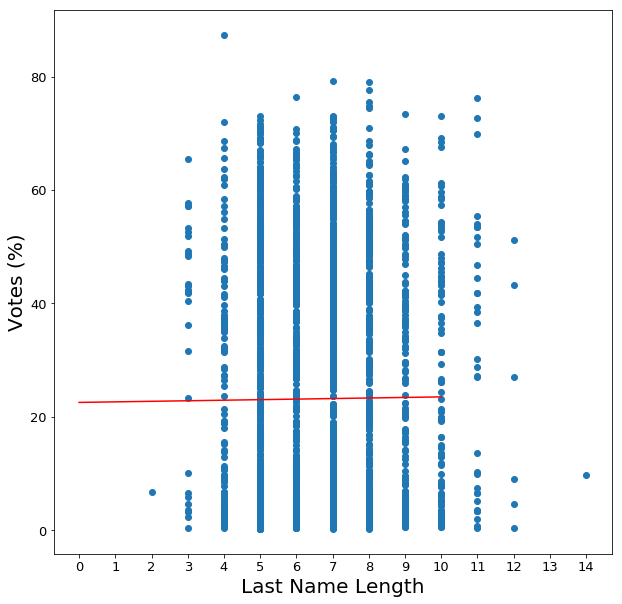

In [54]:
X = election_results_name_not_null.last_name_length
X = sm.add_constant(X)
y = election_results_name_not_null['votes_%']

model = sm.OLS(y, X)

est = model.fit()

const, last_name_coef = est.params

plt.scatter(X.last_name_length, y)
plt.xlabel('Last Name Length')
plt.ylabel('Votes (%)')
plt.xticks(np.arange(0, max(X.last_name_length)+1, 1.0))

regresssion_line = map(lambda x: last_name_coef * x + const, range(1,12))
plt.plot(regresssion_line, 'r')

est.summary()